### __LETS GROW MORE__
### __TASK-2__
### __STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM__
### __NAME:- ANKUR DAS__

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
#Loading the Data
smp=pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
smp.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
smp.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [5]:
smp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
smp.sum()

Date                    2018-09-282018-09-272018-09-262018-09-252018-0...
Open                                                            304667.45
High                                                             309305.4
Low                                                             299743.15
Last                                                             304180.1
Close                                                            304131.3
Total Trade Quantity                                           4753111658
Turnover (Lacs)                                                7936460.45
dtype: object

In [7]:
smp.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
smp.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### __Histograms__

<Axes: >

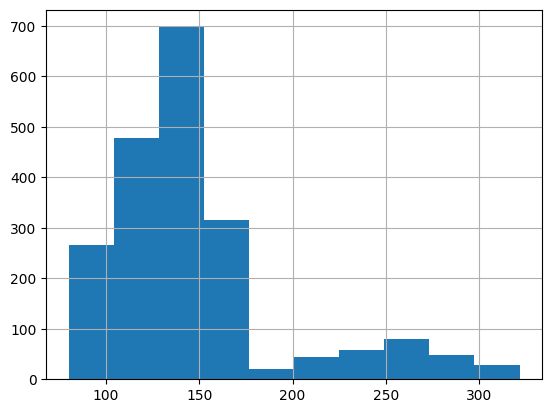

In [9]:
smp['Low'].hist()

<Axes: >

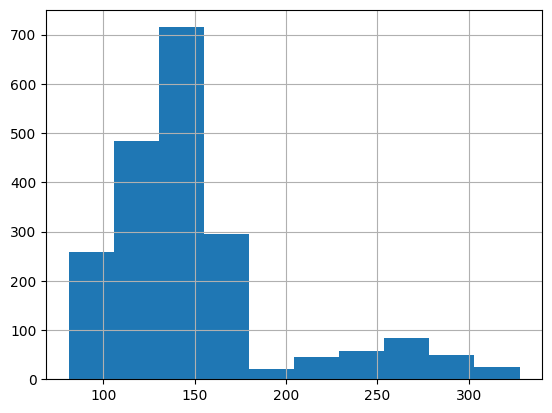

In [10]:
smp['Open'].hist()

### __Plot__

<Axes: >

<Figure size 1200x700 with 0 Axes>

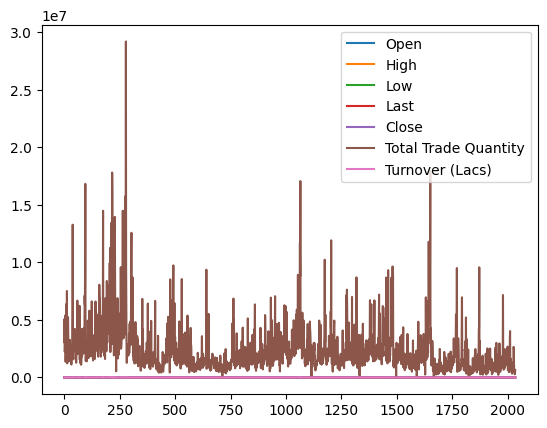

In [11]:
plt.figure(figsize=(12,7))
smp.plot()

### __Heatmap__

C:\Users\USER\AppData\Local\Temp\ipykernel_7744\436303272.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(smp.corr(),annot=True)


<Axes: >

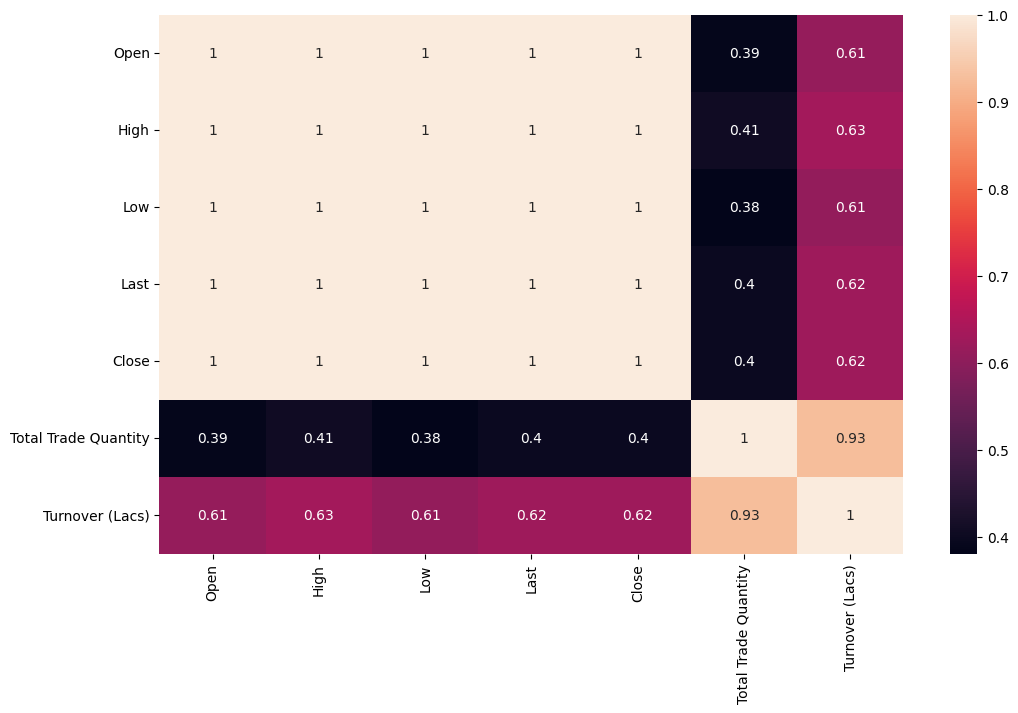

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(smp.corr(),annot=True)

### __Line Charts__

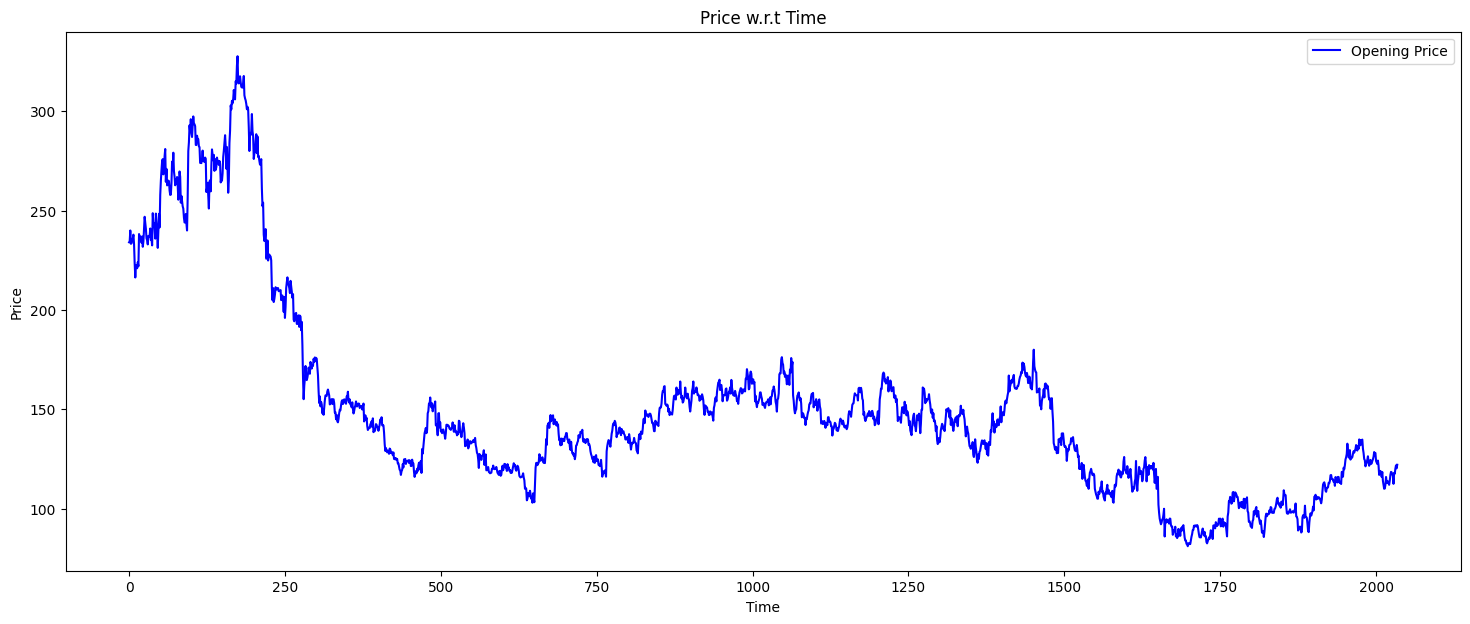

In [13]:
##Line Chart of Price w.r.t time
plt.figure(figsize=(12,7))
smp['Open'].plot(figsize=(18,7),kind='line',color='blue',label='Opening Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price w.r.t Time')
plt.legend(loc='upper right')
plt.show()

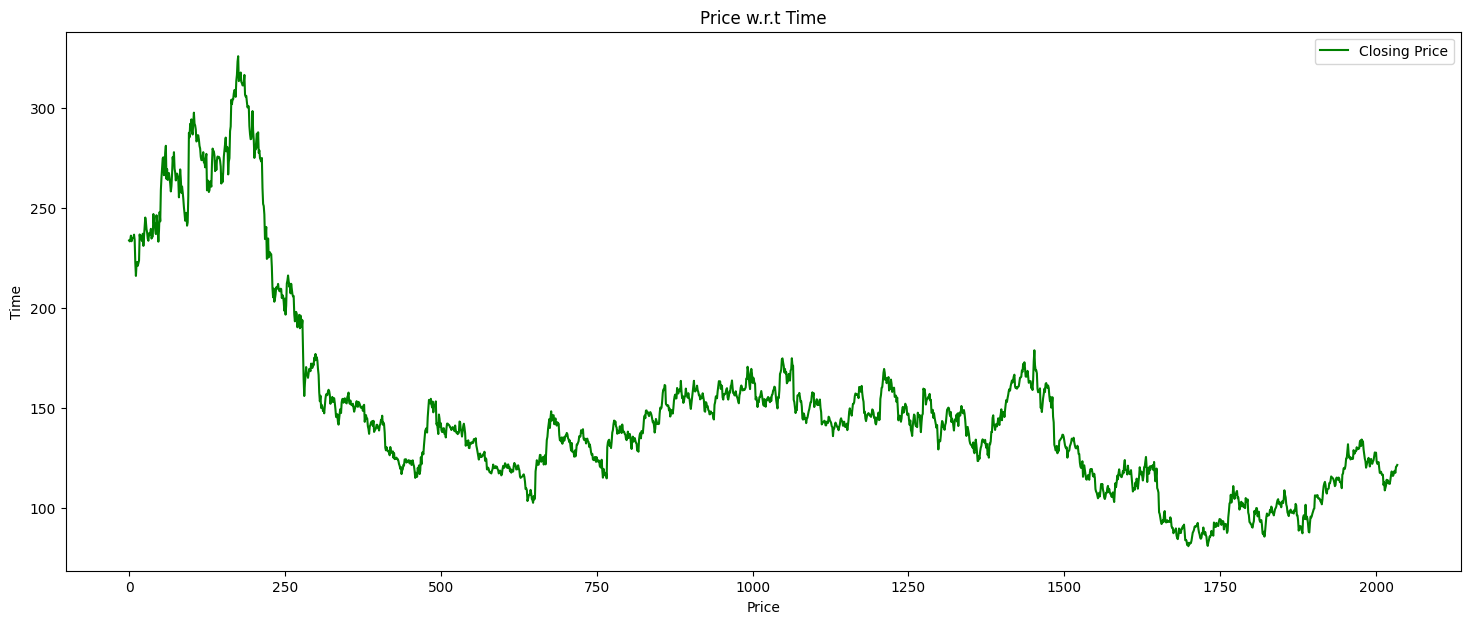

In [14]:
#Line Chart of Price w.r.t Time
plt.figure(figsize=(12,7))
smp['Close'].plot(figsize=(18,7),kind='line',color='Green',label='Closing Price')
plt.xlabel('Price')
plt.ylabel('Time')
plt.title('Price w.r.t Time')
plt.legend(loc='upper right') 
plt.show()

### __PairPlot__

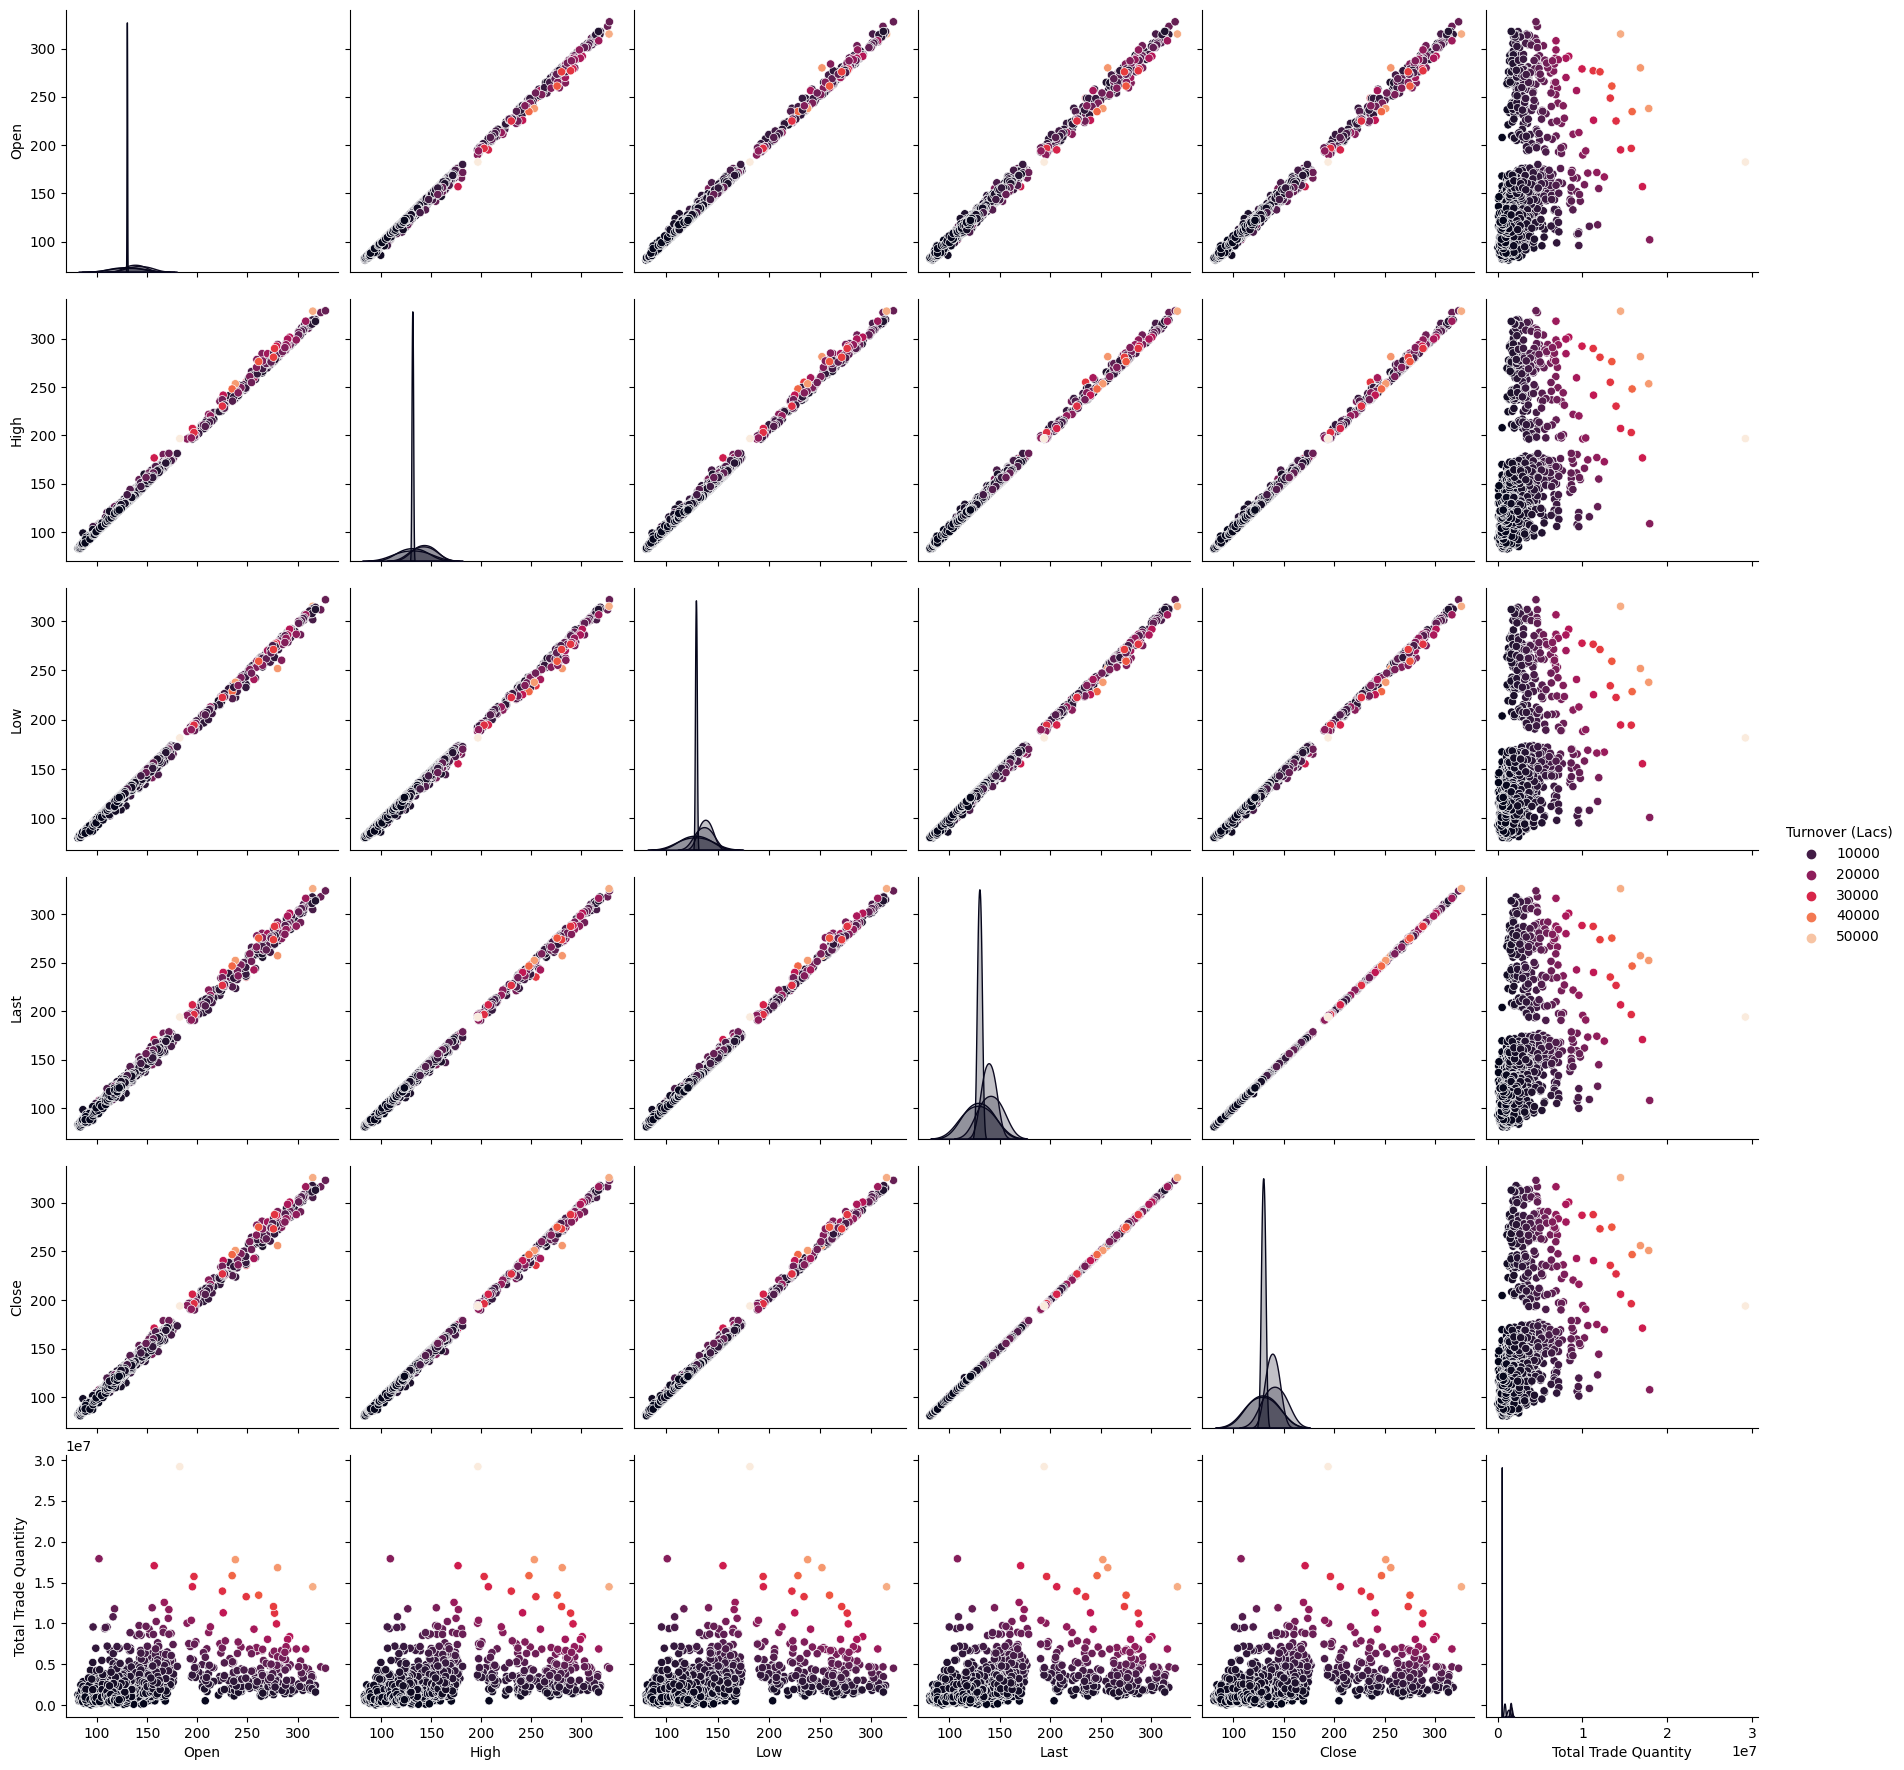

In [15]:
sns.pairplot(smp,palette='rocket',hue='Turnover (Lacs)',height=3)
plt.show()

In [16]:
smpopen=smp.reset_index()['Open']
print(smpopen)

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64


In [17]:
smpclose=smp.reset_index()['Close']
print(smpclose)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


In [18]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))
smpopen=minmax.fit_transform(smpclose.values.reshape(-1,1))
smpopen

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [19]:
smp_trainsize=int(len(smpopen)*0.8)
smp_testsize=len(smpopen)-smp_trainsize
print(smp_trainsize,smp_testsize)

1628 407


In [20]:
smp_traindata=smpopen[0:smp_trainsize,:]
smp_testdata=smpopen[smp_trainsize:len(smp),:1]
print(smp_traindata.shape,smp_testdata.shape)

(1628, 1) (407, 1)


#### __Preparation of Data__

In [21]:
def create_new_data(data,time_step):
    smp_xdata=[]
    smp_ydata=[] 
    for i in range(len(data)-time_step-1):
      smpprev=data[i:(i+time_step),0]
      smp_xdata.append(smpprev)
      smp_ydata.append(data[(i+time_step),0])
    return np.array(smp_xdata),np.array(smp_ydata)

In [22]:
time_step=100
smp_x_train,smp_y_train=create_new_data(smp_traindata,time_step)
smp_x_test,smp_y_test=create_new_data(smp_testdata,time_step)

In [23]:
smp_x_train=smp_x_train.reshape(smp_x_train.shape[0],smp_x_train.shape[1],1)
smp_x_test=smp_x_test.reshape(smp_x_test.shape[0],smp_x_test.shape[1],1)
print(smp_x_test.shape,smp_y_test.shape)

(306, 100, 1) (306,)


### __Implementation of LDTM__

In [24]:
#Importing libraries for LDTM implementation
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LSTM

In [25]:
predmodel=Sequential()
predmodel.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
predmodel.add(LSTM(50,return_sequences=True))
predmodel.add(LSTM(50))
predmodel.add(Dense(1))
predmodel.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
predmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
predmodel.fit(smp_x_train,smp_y_train,epochs=40,batch_size=21,validation_data=(smp_x_test,smp_y_test),verbose=1)

Epoch 1/40
73/73 [==============================] - 27s 209ms/step - loss: 0.0085 - val_loss: 9.1236e-04
Epoch 2/40
73/73 [==============================] - 14s 197ms/step - loss: 0.0014 - val_loss: 7.8261e-04
Epoch 3/40
73/73 [==============================] - 15s 202ms/step - loss: 0.0011 - val_loss: 6.3525e-04
Epoch 4/40
73/73 [==============================] - 14s 185ms/step - loss: 0.0011 - val_loss: 5.9695e-04
Epoch 5/40
73/73 [==============================] - 14s 191ms/step - loss: 9.2449e-04 - val_loss: 3.8039e-04
Epoch 6/40
73/73 [==============================] - 15s 200ms/step - loss: 7.6322e-04 - val_loss: 4.0323e-04
Epoch 7/40
73/73 [==============================] - 14s 193ms/step - loss: 8.8775e-04 - val_loss: 4.3522e-04
Epoch 8/40
73/73 [==============================] - 14s 193ms/step - loss: 6.8801e-04 - val_loss: 4.7095e-04
Epoch 9/40
73/73 [==============================] - 14s 195ms/step - loss: 6.7447e-04 - val_loss: 3.8211e-04
Epoch 10/40
73/73 [================

In [28]:
smp_trainpred,smp_testpred=predmodel.predict(smp_x_train),predmodel.predict(smp_x_test)

In [29]:
from math import sqrt
smp_mse_train,smp_mse_test=sqrt(mean_squared_error(smp_y_train,smp_trainpred)),sqrt(mean_squared_error(smp_y_test,smp_testpred))
print(smp_mse_train)
print(smp_mse_test)

0.013747903925079779
0.011287244120528684


In [30]:
smp_trainpred,smp_testpred=minmax.inverse_transform(smp_trainpred),minmax.inverse_transform(smp_testpred)

#### __Plotting the Model__

In [31]:
look=100
smp_trainpredplot=np.empty_like(smpopen)
smp_trainpredplot[:,:]=np.nan
smp_trainpredplot[look:len(smp_trainpred)+look,:]=smp_trainpred
smp_testpredplot=np.empty_like(smpopen)
smp_testpredplot[:,:]=np.nan
smp_testpredplot[len(smp_trainpred)+(look*2)+1:len(smpclose)-1,:]=smp_testpred

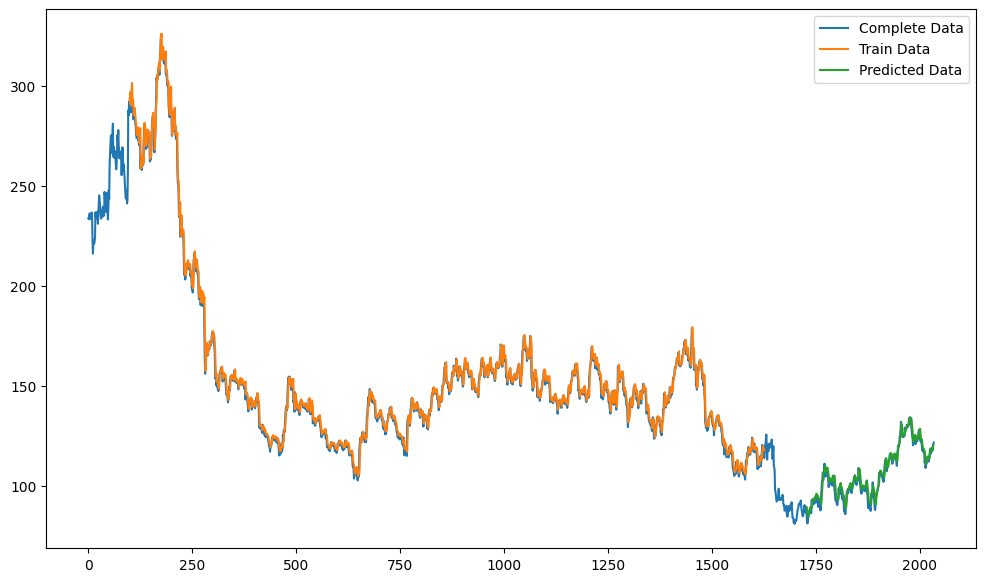

In [32]:
plt.figure(figsize=(12,7))
plt.plot(minmax.inverse_transform(smpopen))
plt.plot(smp_trainpredplot)
plt.plot(smp_testpredplot)
plt.legend(labels=['Complete Data','Train Data','Predicted Data'])
plt.show()

## __Conclusion:-__
#### __Hence Prediction and Forecasting of Stock Market can be done through this model using Stacked LSTM.__